## Part A

Write MATLAB code that generates samples from this distribution. 

Plot the distribution of $r$ for a single draw of $x$ as a histogram (i.e., generate a single random
vector $x$ and use this to draw multiple samples of $r|x$ to generate the histogram). Try the same
with drawing different $x$ repeatedly.

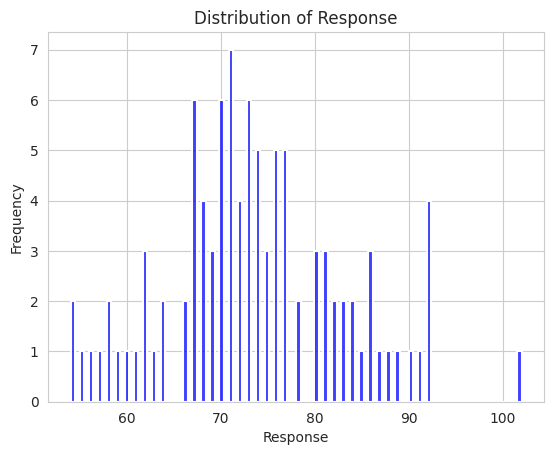

In [2]:
import seaborn as sns
from sthom215_problem_1_ex_2 import Neuron
import seaborn as sns

num_nerurons = 1
neuron = Neuron(100, mu=0, sigma=1)
# Simulate the neuron by using returned intesnity to simulate poisson spikes
resp = neuron.spiking()
import matplotlib.pyplot as plt

# Set the style and color palette
sns.despine()
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the histogram
sns.histplot(resp, bins=100, kde=False, color="b", edgecolor="w", linewidth=1.5)

# Add labels and title
plt.xlabel("Response")
plt.ylabel("Frequency")
plt.title("Distribution of Response")

# Show the plot
plt.show()


## Part B

Now generate a single response draw for each of M different stimuli $ x_m $, $ m = 1, ..., M $,
where M should be a parameter in your code that is easily adjustable. The response vector should
now be an $ M $ dimensional vector $ r $ ∈ $ \mathbb{R}^M $ with a corresponding matrix $ X = [x_1, ..., x_M] $ containing
all of your generated stimuli. Often in higher dimensional settings we linearize models, in this
case assuming that $ r \approx Xg $ with added independent, identically distributed (i.i.d.) Gaussian
noise. Set up a probabilistic relationship (likelihood) of $ r $ conditioned on $ g $ under a Gaussian
noise assumption. Specifically, assume that $ r = Xg + \epsilon $ where $ \epsilon $ is a mean-zero, Gaussian noise
vector with variance $ \sigma^2I $. Use the likelihood derived to set up a maximum likelihood inference of
$ g $ given the responses and stimuli (hint: think least-squares). 

In [3]:
import numpy as np
import numpy.linalg as la
from sthom215_problem_1_ex_2 import Neuron

num_nerurons = 200
n_trials = 100
neurons =  Neuron(num_nerurons, n_trials, mu=0, sigma=1)
resp_m = neurons.activity()
stimuli_m = neurons.stimuli

true_g = neurons.get_tuning_curve(neurons.n_trials)
r_noise = np.dot(stimuli_m , true_g) + np.random.normal(0, 0.1, resp_m.shape[0])
lsqr_g = la.lstsq(stimuli_m, r_noise, rcond=None)[0]

print("tuning curve: ", lsqr_g.shape)

tuning curve:  (100,)


In [4]:
ml_g = stimuli_m.mean(axis=0)

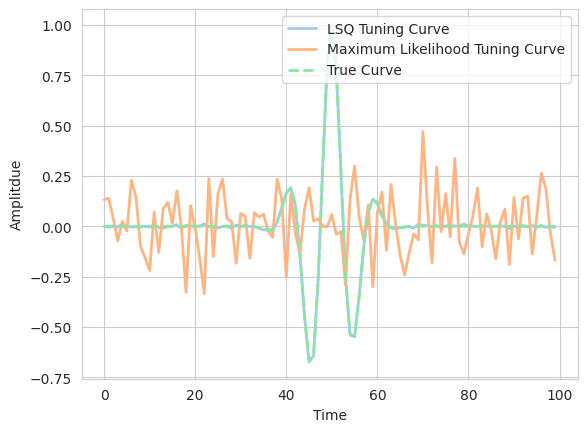

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

f1 = ax.plot(lsqr_g, linewidth=2.0, label="LSQ Tuning Curve")
f2 = ax.plot(ml_g, linewidth=2.0, label="Maximum Likelihood Tuning Curve")
f3 = ax.plot(true_g, linestyle = '--', linewidth=2.0, label="True Curve")

ax.legend()

ax.set_xlabel("Time")
ax.set_ylabel("Amplitdue")

plt.show()


### How close is the estimate of $g$ to the real $g$

It is very close in the least squares sense after linearization. 

## Part C
Now use the actual known likelihood (in this case) to estimate $ g $ by setting up an optimization program using likelihood defined above. You should focus on defining the minimization program and then using the fminunc function in MATLAB.
Infer the tuning curve using $ M = N $ samples. How accurate are the curves? What about for $ M = 2N $? $ M = N/2 $? Plot the estimates from Part C and Part B together. What do you notice about the estimates as the number of samples gets large?


In [ ]:
from scipy.optimize import minimize
import seaborn as sns

num_nerurons = 200
n_trials = 100
neurons =  Neuron(num_nerurons, n_trials, mu=0, sigma=1)
true_g = neuron.get_tuning_curve(neuron.n_trials)


def obj(g,X,r):
    lam = np.exp(X @ g)
    return -r.T @ np.log(lam) + lam.sum() 

# Minimize the cost function
resp_m = neurons.activity()
stimuli_m = neurons.stimuli

#g_init = np.random.normal(0, 1, (neurons.n_trials,))
g_init = np.zeros_like(true_g)

opt = {'disp': True, 'maxiter': 1000, 'gtol': 1e-9}
result = minimize(fun = obj, 
                  x0=g_init, 
                  args=(stimuli_m, resp_m), 
                  method='BFGS',
                  options = opt)


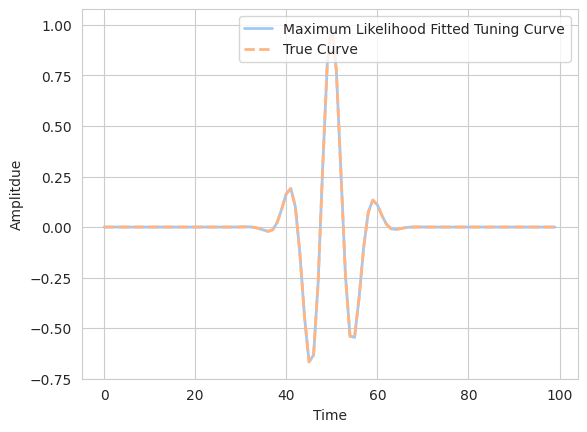

In [14]:
fig = plt.figure()
ax = fig.gca()


sns.lineplot(result.x, linewidth=2.0, label="Maximum Likelihood Fitted Tuning Curve", ax=ax)
sns.lineplot(true_g, linestyle = '--', linewidth=2.0, label="True Curve", ax=ax)
ax.set_xlabel("time")
ax.set_ylabel('ampltidue')

ax.legend()

ax.set_xlabel("Time")
ax.set_ylabel("Amplitdue")

plt.show()

## Part D
Adding in priors: Now let’s add some prior knowledge about the tuning curve. For the
Gaussian case, add a Gaussian prior $ p(g) \sim \mathcal{N}(0, \sigma^2I) $. Recall that with priors we change from
a maximum likelihood to a maximum a-posteriori (MAP) estimation. Use the definition of the
MAP estimate and Bayes rule to derive the estimator. How does this change the optimization?
How about the estimated tuning curve?
For the Poisson case, add a “smoothing” term $ p(\nabla g) \sim \mathcal{N}(0, \sigma^2I) $ (following the same procedure).
How does this affect the optimization? How about the estimated tuning curve?


# Part E

Part E Parameter regimes: Finally you should have code that generates a number of samples $ M $
that probe an $ N $ dimensional receptive field. You should be able to change these parameters as
well as the stimulus strength $ A $ (multiplier of $ X $) as well as the level of regularization (i.e., the
variance of the prior $ \sigma $). Vary these parameters. What happens at low signal levels? How many
samples do you need if $ A = 0.01 $? Compare these observations with the histograms of the spike
counts.
